<a href="https://colab.research.google.com/github/cecnyb/AgileSoftwareProject/blob/main/YelpR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group X Yelp R



## Members of group:
*   Wilhelm JOHNSON SWEGMARK
*   Emelie LÖFGREN
*   Karin NORBERG
*   Frida SJÖGREN

##Preliminary analysis

* **What type of documents does it contain?** \\
The data set is a large collection of product reviews with ratings. Each document contains two fields, that is the review and its corresponding star rating. The text reviews are presented in double quotes ('') and if there is any internal quotes they are inside two double quotes (""). The corresponding label are the score connected to the review (between 1 and 5).  

* **How many documents are there?** \\
According to https://huggingface.co/datasets/yelp_review_full, the Yelp reviews full star dataset is constructed by randomly taking 130,000 training samples and 10,000 testing samples for each review star from 1 to 5. This results in a total of 650,000 trainig samples and 50,000 testing samples. And hence in total we have 700,000 reviews.


* **Calculate and visualise some simple statistics for the collection, e.g. the average document length, the average vocabulary size, etc.**


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import string

In [2]:
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("yelp_review_full")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 650000
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 50000
    })
})

In [4]:
train_df = pd.DataFrame(dataset["train"])
test_df = pd.DataFrame(dataset["test"])

In [ ]:
train_df.head()

,label,text
0,4,dr. goldberg offers everything i look for in a...
1,1,"Unfortunately, the frustration of being Dr. Go..."
2,3,Been going to Dr. Goldberg for over 10 years. ...
3,3,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...


In [ ]:
test_df.head()

,label,text
0,0,I got 'new' tires from them and within two wee...
1,0,Don't waste your time. We had two different p...
2,0,All I can say is the worst! We were the only 2...
3,0,I have been to this restaurant twice and was d...
4,0,Food was NOT GOOD at all! My husband & I ate h...


In [7]:
train_df['label'].value_counts()

label
4    130000
1    130000
3    130000
0    130000
2    130000
Name: count, dtype: int64

In [8]:
test_df['label'].value_counts()

label
0    10000
2    10000
1    10000
3    10000
4    10000
Name: count, dtype: int64

I checked and there is no duplicates in either of the dataframes so we do not have to worry about that

In [9]:
documents = train_df['text']
total_lenght = sum(len(doc) for doc in documents)
number_documents = len(documents)
average_length = total_lenght / number_documents
print("Average length (in characters) of each document in training data set:", average_length)

Average length (in characters) of each document in training data set: 732.3254676923077


In [10]:
documents = test_df['text']
total_lenght = sum(len(doc) for doc in documents)
number_documents = len(documents)
average_length = total_lenght / number_documents
print("Average length (in characters) of each document in test data set:", average_length)

Average length (in characters) of each document in test data set: 733.42376


In [11]:
for i in range(5):
  documents_rating = test_df[test_df['label'] == i]['text']
  total_lenght = sum(len(doc) for doc in documents_rating)
  number_documents = len(documents_rating)
  average_length = total_lenght / number_documents
  print(f"Average length (in characters) of each document in test data set for {i} rating:", average_length)

print("")

for i in range(5):
  documents_rating = train_df[train_df['label'] == i]['text']
  total_lenght = sum(len(doc) for doc in documents_rating)
  number_documents = len(documents_rating)
  average_length = total_lenght / number_documents
  print(f"Average length (in characters) of each document in train data set for {i} rating:", average_length)

Average length (in characters) of each document in test data set for 0 rating: 812.7109
Average length (in characters) of each document in test data set for 1 rating: 827.4626
Average length (in characters) of each document in test data set for 2 rating: 766.8509
Average length (in characters) of each document in test data set for 3 rating: 686.3262
Average length (in characters) of each document in test data set for 4 rating: 573.7682

Average length (in characters) of each document in train data set for 0 rating: 815.3077615384616
Average length (in characters) of each document in train data set for 1 rating: 827.6257923076923
Average length (in characters) of each document in train data set for 2 rating: 758.6954538461539
Average length (in characters) of each document in train data set for 3 rating: 680.1599846153846
Average length (in characters) of each document in train data set for 4 rating: 579.8383461538461


In [ ]:
# Removing stop words, casefolding and tokenize text

nltk.download('punkt')
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of tokens
def remove_stopwords(tokenized_text):
    return [word.lower() for word in tokenized_text if word.lower() not in stop_words]

# Tokenize the 'text' column in train_df
train_df['tokenized_text'] = train_df['text'].apply(word_tokenize)

# Remove stopwords from the tokenized text in train_df
train_df['cleaned_text'] = train_df['tokenized_text'].apply(remove_stopwords)

# Tokenize the 'text' column in test_df
test_df['tokenized_text'] = test_df['text'].apply(word_tokenize)

# Remove stopwords from the tokenized text in test_df
test_df['cleaned_text'] = test_df['tokenized_text'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Tokenization

# Tokenize the 'text' column in train_df
train_df['tokenized_text'] = train_df['text'].apply(word_tokenize)

# Tokenize the 'text' column in test_df
test_df['tokenized_text'] = test_df['text'].apply(word_tokenize)

In [ ]:
# Stop word removal + casefolding

nltk.download('stopwords')

def remove_stopwords(tokenized_text):
    return [word.lower() for word in tokenized_text if word.lower() not in stop_words]

# Remove stopwords from the tokenized text in train_df
train_df['cleaned_text'] = train_df['tokenized_text'].apply(remove_stopwords)

# Remove stopwords from the tokenized text in test_df
test_df['cleaned_text'] = test_df['tokenized_text'].apply(remove_stopwords)

In [ ]:
documents = train_df['cleaned_text']
total_lenght = sum(len(doc) for doc in documents)
number_documents = len(documents)
average_length = total_lenght / number_documents
print("Average length (in words) of each document in training data set:", average_length)

In [ ]:
documents = test_df['cleaned_text']
total_lenght = sum(len(doc) for doc in documents)
number_documents = len(documents)
average_length = total_lenght / number_documents
print("Average length (in words) of each document in test data set:", average_length)

Average length (in words) of each document in test data set: 88.539


Average length (in words) of each document in test data set for 0 rating: 96.3365
Average length (in words) of each document in test data set for 1 rating: 99.1657
Average length (in words) of each document in test data set for 2 rating: 92.9657
Average length (in words) of each document in test data set for 3 rating: 83.9916
Average length (in words) of each document in test data set for 4 rating: 70.2355

Average length (in words) of each document in train data set for 0 rating: 96.80037692307693
Average length (in words) of each document in train data set for 1 rating: 99.23755384615384
Average length (in words) of each document in train data set for 2 rating: 92.03353076923077
Average length (in words) of each document in train data set for 3 rating: 83.26292307692307
Average length (in words) of each document in train data set for 4 rating: 70.90173076923077


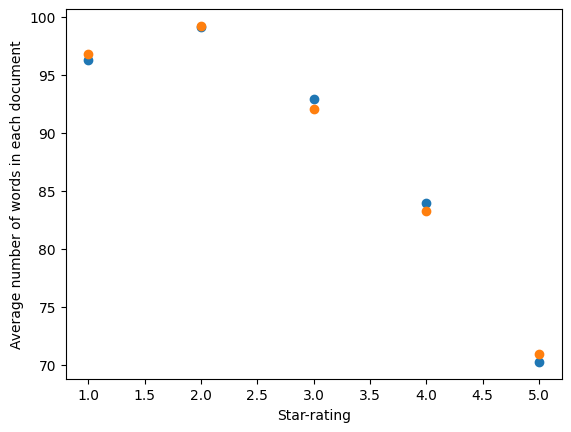

In [ ]:
average_lengths_test = []
average_lengths_train = []

for i in range(5):
  documents_rating = test_df[test_df['label'] == i]['cleaned_text']
  total_lenght = sum(len(doc) for doc in documents_rating)
  number_documents = len(documents_rating)
  average_length = total_lenght / number_documents
  average_lengths_test.append(average_length)
  print(f"Average length (in words) of each document in test data set for {i} rating:", average_length)

print("")

for i in range(5):
  documents_rating = train_df[train_df['label'] == i]['cleaned_text']
  total_lenght = sum(len(doc) for doc in documents_rating)
  number_documents = len(documents_rating)
  average_length = total_lenght / number_documents
  average_lengths_train.append(average_length)
  print(f"Average length (in words) of each document in train data set for {i} rating:", average_length)

plt.xlabel("Star-rating")
plt.ylabel("Average number of words in each document")
plt.plot(range(1,6), average_lengths_test,'o')
plt.plot(range(1,6), average_lengths_train,'o')


In [ ]:
# Vocabulary size comparision

documents = train_df['tokenized_text']
total_lenght = sum(len(set(doc)) for doc in documents)
number_documents = len(documents)
average_length_1 = total_lenght / number_documents
print("Average vocabulary size per document in training data set:", average_length_1)

documents = train_df['cleaned_text']
total_lenght = sum(len(set(doc)) for doc in documents)
number_documents = len(documents)
average_length_2 = total_lenght / number_documents
print("Average vocabulary size per document in training data set after removing stopwords:", average_length_2)

print("Decrease of vocabulary by removing stopwords", round((1-average_length_2/average_length_1)*100, 2), '%')

print("")

documents = test_df['tokenized_text']
total_lenght = sum(len(set(doc)) for doc in documents)
number_documents = len(documents)
average_length_1 = total_lenght / number_documents
print("Average vocabulary size per document in test data set:", average_length_1)

documents = test_df['cleaned_text']
total_lenght = sum(len(set(doc)) for doc in documents)
number_documents = len(documents)
average_length_2 = total_lenght / number_documents
print("Average vocabulary size per document in test data set after removing stopwords:", average_length_2)

print("Decrease of vocabulary by removing stopwords", round((1-average_length_2/average_length_1)*100, 2), '%')

Average vocabulary size per document in training data set: 94.13049538461539
Average vocabulary size per document in training data set after removing stopwords: 63.795543076923074
Decrease of vocabulary by removing stopwords 32.23 %

Average vocabulary size per document in test data set: 94.29884
Average vocabulary size per document in test data set after removing stopwords: 63.87132
Decrease of vocabulary by removing stopwords 32.27 %


##Data processing

##Model training